In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import json
from os.path import expanduser

In [2]:
BASE_RESULTS_DIR = '/media/data-4t-a/results-P3856_YHE211'

In [3]:
experiment_name = 'P3856_YHE211'
feature_detection_method = 'pasef'

IDENTIFICATIONS_WITH_FMDW_DIR = '{}/2022-06-02-16-32-00/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_WITH_FMDW_FILE = '{}/exp-{}-identifications-{}-recalibrated.feather'.format(IDENTIFICATIONS_WITH_FMDW_DIR, experiment_name, feature_detection_method)

In [4]:
IDENTIFICATIONS_WITH_FMDW_FILE

'/media/data-4t-a/results-P3856_YHE211/2022-06-02-16-32-00/identifications-pasef/exp-P3856_YHE211-identifications-pasef-recalibrated.feather'

In [5]:
MAXIMUM_Q_VALUE = 0.01

#### identifications with mass defect window filtering

In [6]:
# load the identifications that had saturated points in the mono
identifications_with_fmdw_df = pd.read_feather(IDENTIFICATIONS_WITH_FMDW_FILE)
identifications_with_fmdw_df = identifications_with_fmdw_df[(identifications_with_fmdw_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

#### identifications without mass defect window filtering

In [7]:
IDENTIFICATIONS_WITHOUT_FMDW_DIR = '{}/2022-06-02-15-03-00/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_WITHOUT_FMDW_FILE = '{}/exp-{}-identifications-{}-recalibrated.feather'.format(IDENTIFICATIONS_WITHOUT_FMDW_DIR, experiment_name, feature_detection_method)


In [8]:
# load the identifications that had saturated points in the mono
identifications_without_fmdw_df = pd.read_feather(IDENTIFICATIONS_WITHOUT_FMDW_FILE)
identifications_without_fmdw_df = identifications_without_fmdw_df[(identifications_without_fmdw_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

In [9]:
selected_feature_id = identifications_without_fmdw_df.sample(n=1).iloc[0].feature_id

In [10]:
selected_feature_without_fmdw = identifications_without_fmdw_df[(identifications_without_fmdw_df.feature_id == selected_feature_id)]
selected_feature_without_fmdw

,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,rt_apex,rt_lower,rt_upper,intensity_without_saturation_correction,intensity_with_saturation_correction,...,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,observed_monoisotopic_mass,theoretical_peptide_mass,mass_accuracy_ppm,mass_error
8424,772.356934,772.406128,523.0,492,550,2012.4552,2009.810547,2018.806885,3826,3826,...,0.000869,0.067159,20763.4,VLGTEDLYDYIDK,sp|P68400|CSK21_HUMAN,KY,1542.743932,1542.7453,-0.886906,-0.001368


In [11]:
len(json.loads(selected_feature_without_fmdw.iloc[0].fragment_ions_l))

104

In [12]:
selected_feature_with_fmdw = identifications_with_fmdw_df[(identifications_with_fmdw_df.feature_id == selected_feature_id)]
selected_feature_with_fmdw

,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,rt_apex,rt_lower,rt_upper,intensity_without_saturation_correction,intensity_with_saturation_correction,...,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,observed_monoisotopic_mass,theoretical_peptide_mass,mass_accuracy_ppm,mass_error
8421,772.356934,772.406128,523.0,492,550,2012.4552,2009.810547,2018.806885,3826,3826,...,0.000886,0.059099,20685.8,VLGTEDLYDYIDK,sp|P68400|CSK21_HUMAN,KY,1542.744093,1542.7453,-0.782392,-0.001207


In [13]:
len(json.loads(selected_feature_with_fmdw.iloc[0].fragment_ions_l))

81

#### unique identifications found with and without mass defect window filtering

In [14]:
sequences_l = []
for group_name,group_df in identifications_with_fmdw_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    percolator_score = group_df['percolator score'].mean()
    q_value = group_df['percolator q-value'].mean()
    if percolator_score > 0:
        sequences_l.append({'sequence':sequence, 'charge':charge, 'score':percolator_score, 'q_value':q_value})
sequences_with_fmdw_df = pd.DataFrame(sequences_l)

In [15]:
sequences_l = []
for group_name,group_df in identifications_without_fmdw_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    percolator_score = group_df['percolator score'].mean()
    q_value = group_df['percolator q-value'].mean()
    if percolator_score > 0:
        sequences_l.append({'sequence':sequence, 'charge':charge, 'score':percolator_score, 'q_value':q_value})
sequences_without_fmdw_df = pd.DataFrame(sequences_l)

In [16]:
print('{} unique ids with fmdw, {} without'.format(len(sequences_with_fmdw_df), len(sequences_without_fmdw_df)))

7820 unique ids with fmdw, 7817 without


In [17]:
combined_df = pd.merge(sequences_with_fmdw_df, sequences_without_fmdw_df, how='inner', left_on=['sequence','charge'], right_on=['sequence','charge'], suffixes=['_with_fmdw','_without_fmdw'])


In [18]:
combined_df.sample(n=5)

,sequence,charge,score_with_fmdw,q_value_with_fmdw,score_without_fmdw,q_value_without_fmdw
3159,IIPTLEEGLQLPSPTATSQLPLESDAVECLNYQHYK,3,0.927940,0.000162,0.925732,0.000155
79,ADTGIAVEGATDAAR,2,0.760157,0.000162,0.680183,0.000155
5814,SHCFVTYSTVEEAVATR,2,0.691840,0.000162,0.640681,0.000155
4610,MNLASEPQEVLHIGSAHNR,3,0.863939,0.000162,0.770028,0.000155
2530,GTVLLHNAQEMLDFSK,2,0.202304,0.001004,0.186816,0.000869


#### compare identification score with and without

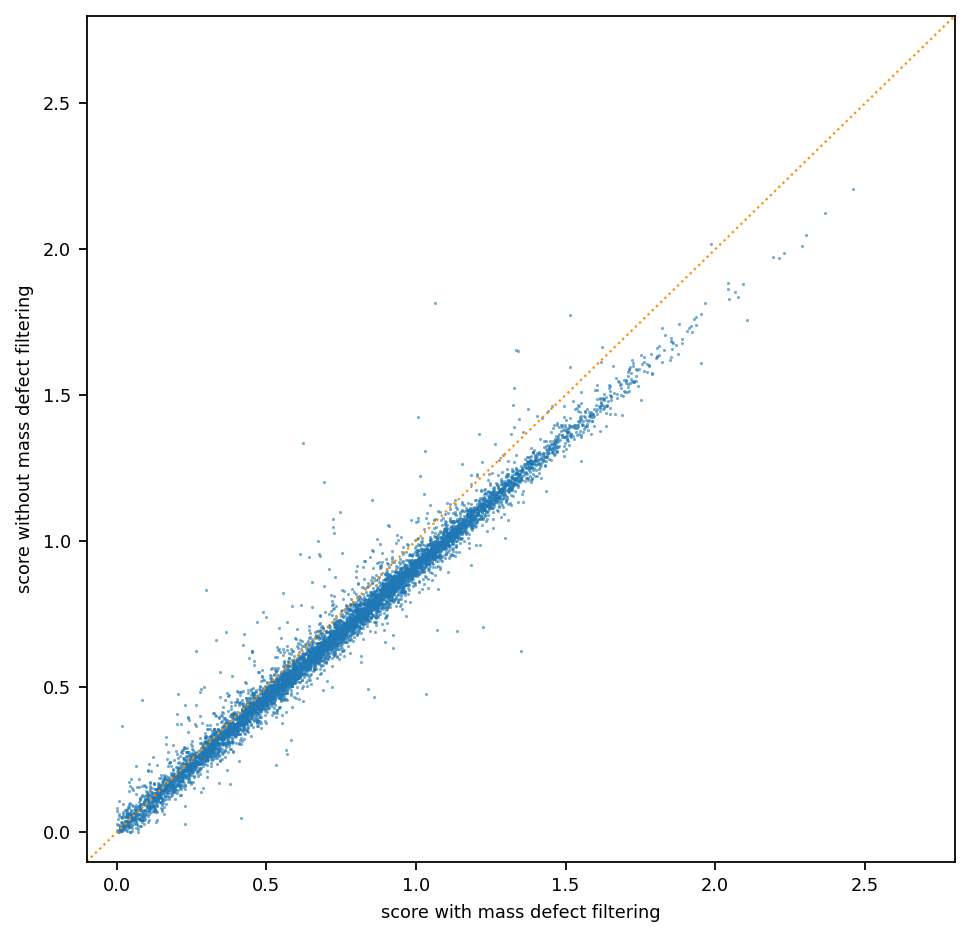

In [19]:
f, ax = plt.subplots()
f.set_figheight(7)
f.set_figwidth(7)
f.set_dpi(160)

plt.margins(0.04)
# plt.title('percolator score of identified features with and without mass defect window filtering')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax.scatter(combined_df.score_with_fmdw, combined_df.score_without_fmdw, marker='o', lw=0, s=2, alpha=0.6)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=1, color='darkorange')

plt.xlim((-0.1,2.8))
plt.ylim((-0.1,2.8))

plt.xlabel('score with mass defect filtering', fontsize=8)
plt.ylabel('score without mass defect filtering', fontsize=8)

plt.show()

In [20]:
f.savefig('{}/paper-2-figure-15.tiff'.format(expanduser('~')), dpi=300, bbox_inches='tight')

##### show percentage improvement for each identification in common

In [21]:
combined_df['score_improvement'] = (combined_df.score_with_fmdw - combined_df.score_without_fmdw) / combined_df.score_without_fmdw * 100.0

In [22]:
average_improvement = combined_df.score_improvement.mean()
print('average improvement in score is {:.2f}%'.format(average_improvement))

average improvement in score is 10.35%


In [23]:
df = combined_df[abs(combined_df.score_improvement) <= 100]

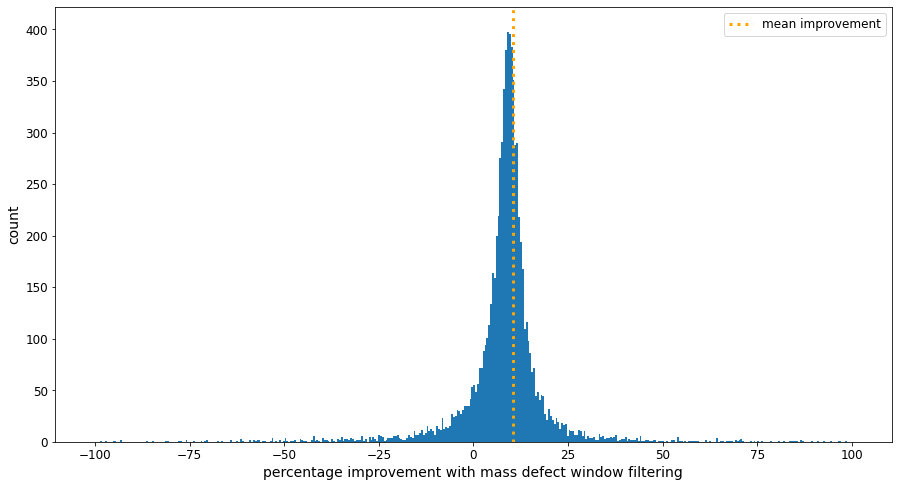

In [24]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
# plt.title('distribution of percentage improvement in percolator score with mass defect window filtering')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

bins = 400
hist, bins, _ = plt.hist(df.score_improvement, bins=bins)
plt.xlabel('percentage improvement with mass defect window filtering', fontsize=14)
plt.ylabel('count', fontsize=14)

# plt.xlim((-50,50))
# plt.ylim((0,300))

plt.axvline(x=average_improvement, linestyle=':', linewidth=3, color='orange', label='mean improvement')

plt.legend(fontsize=12)
plt.show()

#### compare identification q-value with and without

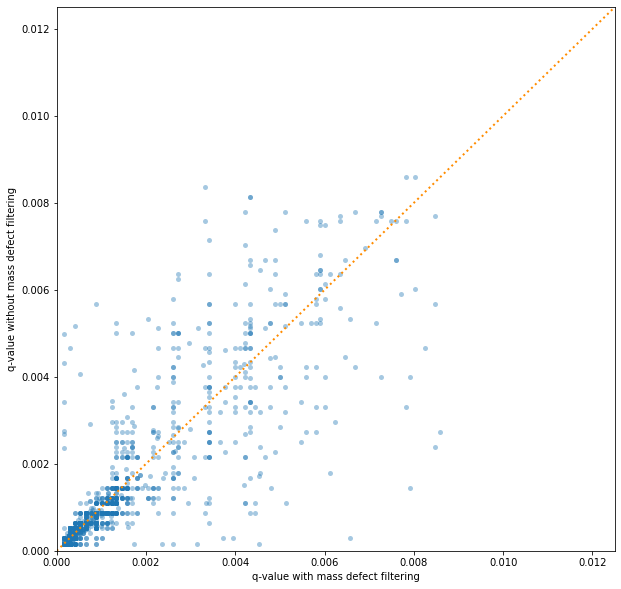

In [25]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
plt.title('')

ax.scatter(combined_df.q_value_with_fmdw, combined_df.q_value_without_fmdw, marker='o', lw=0, s=25, alpha=0.4)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

plt.xlim((0,0.0125))
plt.ylim((0,0.0125))

plt.xlabel('q-value with mass defect filtering')
plt.ylabel('q-value without mass defect filtering')

plt.show()

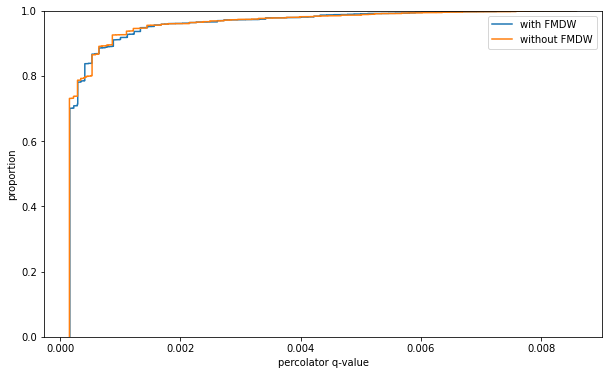

In [26]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# title = 'ECDF of Percolator q-value'
# plt.title(title)

ax = sns.ecdfplot(data=combined_df, x="q_value_with_fmdw", label='with FMDW')
_ = sns.ecdfplot(data=combined_df, x="q_value_without_fmdw", label='without FMDW')
plt.legend(loc='best')
_ = ax.set(xlabel='percolator q-value', ylabel='proportion')

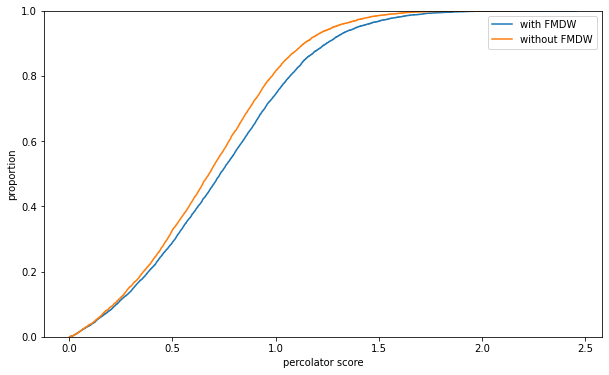

In [27]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# title = 'ECDF of Percolator score'
# plt.title(title)

ax = sns.ecdfplot(data=combined_df, x="score_with_fmdw", legend=True, label='with FMDW')
_ = sns.ecdfplot(data=combined_df, x="score_without_fmdw", legend=True, label='without FMDW')
plt.legend(loc='best')
_ = ax.set(xlabel='percolator score', ylabel='proportion')

/home/daryl/anaconda3/envs/py36/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/daryl/anaconda3/envs/py36/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


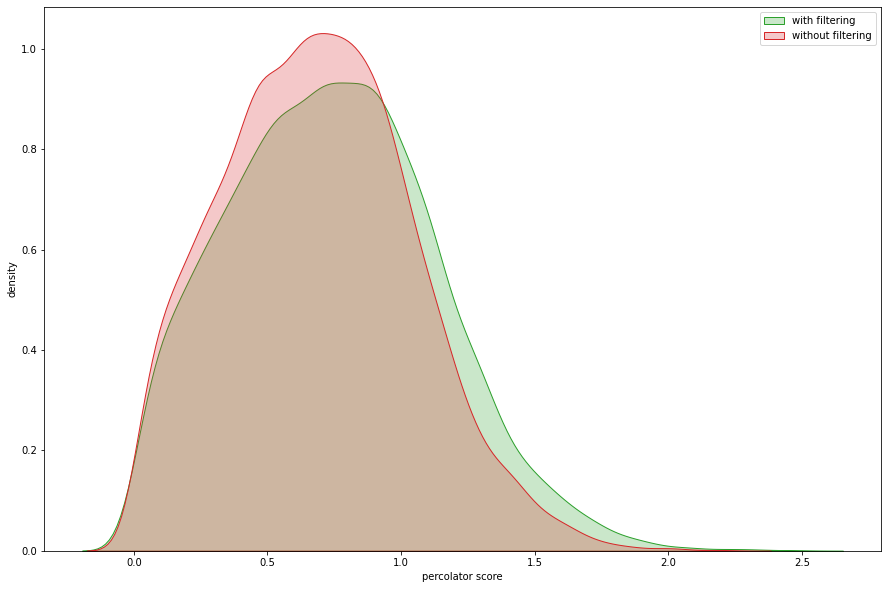

In [28]:
import seaborn as sns
plt.figure(figsize=(15, 10))

# title = 'density of the percolator score of identified features with and without mass defect window filtering'
# plt.title(title)

# plt.xlim((-4,4))
# plt.ylim((0,1))

ax = sns.distplot(combined_df.score_with_fmdw, hist = False, color='tab:green', kde = True, kde_kws = {'shade': True, 'linewidth': 1}, label = 'with filtering')
_ = sns.distplot(combined_df.score_without_fmdw, hist = False, color='tab:red', kde = True, kde_kws = {'shade': True, 'linewidth': 1}, label = 'without filtering')

_ = ax.set(xlabel='percolator score', ylabel='density')
_ = ax.legend()